# Predicting Housing Prices In USA_Regions: A Data Science Project

<B>Introduction:<B>

Here is a model for persons who need help predicting housing prices for regions in the USA. By putting in features
of house it returns back an estimate of what the house would sell for.

The dataset('Usa_Housing.csv') contains columns:
* 'Avg. Area Income': Avg. Income of residents of the city house is located in.
* 'Avg. Area House Age': Avg Age of Houses in same city
* 'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city
* 'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city
* 'Area Population': Population of city house is located in
* 'Price': Price that the house sold at
* 'Address': Address for the house

->We use a USA_Housing dataset to explore,clean,and model the data to predict housing prices accurately.

In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
dataset = pd.read_csv('Usa_Housing.csv')
dataset.sample(8)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
4064,63307.83,6.06,8.02,4.18,31956.52,1286974.70,"122 Kevin Stream\nSouth Donna, MD 76364"
3797,56348.35,6.34,4.89,2.20,23476.97,649223.51,"1629 James Pines\nPort John, LA 49420"
4392,81721.61,4.40,5.86,4.44,40454.82,1130293.60,USNV Lee\nFPO AE 92072
2808,74428.13,6.27,6.11,2.49,49465.95,1471746.56,91582 Fischer Rapids Suite 372\nRichardsonches...
2567,57730.32,5.11,9.00,6.06,42451.31,1299991.95,USCGC Watson\nFPO AP 69692
1347,74022.14,6.74,5.58,4.20,30053.44,1358899.69,Unit 7807 Box 8697\nDPO AA 50317
2684,74419.54,7.81,8.47,3.31,48591.39,2019424.22,"80827 Horn Trafficway\nBennettchester, MP 3545..."
3865,77910.27,4.64,6.30,4.35,28126.83,983180.37,"7319 Gray Street Apt. 003\nHamiltonshire, WI 7..."


In [4]:
dataset.describe

<bound method NDFrame.describe of       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0             79545.46                 5.68                       7.01   
1             79248.64                 6.00                       6.73   
2             61287.07                 5.87                       8.51   
3             63345.24                 7.19                       5.59   
4             59982.20                 5.04                       7.84   
...                ...                  ...                        ...   
4995          60567.94                 7.83                       6.14   
4996          78491.28                 7.00                       6.58   
4997          63390.69                 7.25                       4.81   
4998          68001.33                 5.53                       7.13   
4999          65510.58                 5.99                       6.79   

      Avg. Area Number of Bedrooms  Area Population      Price  \
0          

In [5]:
 # Checkin any missing values
dataset.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

### Feature Engineering

In [6]:
dataset['Price']= dataset['Price'].astype(np.int64)

In [7]:
dataset["Price"] = pd.to_numeric(dataset["Price"])
dataset.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.46,5.68,7.01,4.09,23086.80,1059033,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64,6.00,6.73,3.09,40173.07,1505890,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.07,5.87,8.51,5.13,36882.16,1058987,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24,7.19,5.59,3.26,34310.24,1260616,USS Barnett\nFPO AP 44820
4,59982.20,5.04,7.84,4.23,26354.11,630943,USNS Raymond\nFPO AE 09386


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df= dataset.drop('Address',axis = 1)
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.46,5.68,7.01,4.09,23086.80,1059033
1,79248.64,6.00,6.73,3.09,40173.07,1505890
2,61287.07,5.87,8.51,5.13,36882.16,1058987
3,63345.24,7.19,5.59,3.26,34310.24,1260616
4,59982.20,5.04,7.84,4.23,26354.11,630943


In [10]:
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.00,-0.00,-0.01,0.02,-0.02,0.64
Avg. Area House Age,-0.00,1.00,-0.01,0.01,-0.02,0.45
Avg. Area Number of Rooms,-0.01,-0.01,1.00,0.46,0.00,0.34
Avg. Area Number of Bedrooms,0.02,0.01,0.46,1.00,-0.02,0.17
Area Population,-0.02,-0.02,0.00,-0.02,1.00,0.41
Price,0.64,0.45,0.34,0.17,0.41,1.00


<Figure size 1500x400 with 0 Axes>

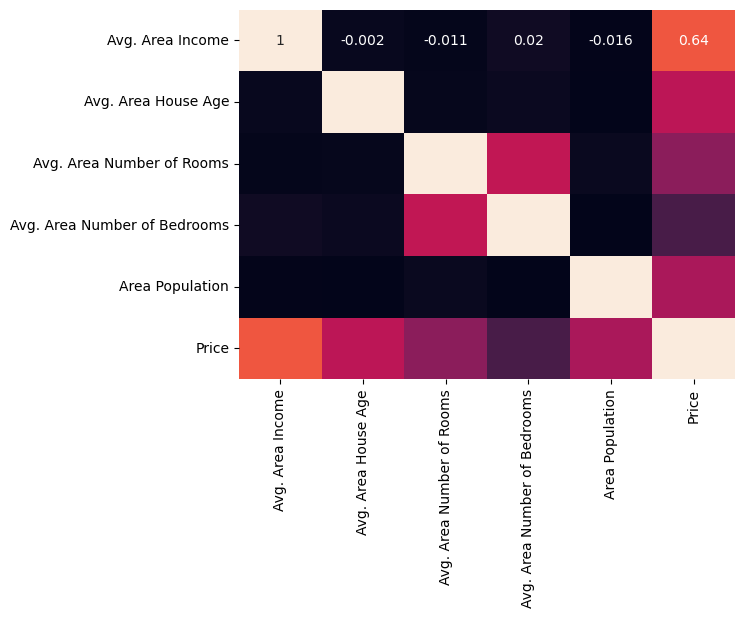

<Figure size 1500x400 with 0 Axes>

In [11]:
sns.heatmap(df.corr(),annot = True,cbar = False)

plt.figure(figsize=(15,4))

### Separating independent variables from target variable

In [12]:
X = df.iloc[:,0:5]
X

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.46,5.68,7.01,4.09,23086.80
1,79248.64,6.00,6.73,3.09,40173.07
2,61287.07,5.87,8.51,5.13,36882.16
3,63345.24,7.19,5.59,3.26,34310.24
4,59982.20,5.04,7.84,4.23,26354.11
...,...,...,...,...,...
4995,60567.94,7.83,6.14,3.46,22837.36
4996,78491.28,7.00,6.58,4.02,25616.12
4997,63390.69,7.25,4.81,2.13,33266.15
4998,68001.33,5.53,7.13,5.44,42625.62


In [14]:
y=df['Price']
#y

0       1059033
1       1505890
2       1058987
3       1260616
4        630943
         ...   
4995    1060193
4996    1482617
4997    1030729
4998    1198656
4999    1298950
Name: Price, Length: 5000, dtype: int64

### ii) Splitting data into train and test sets

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X , y, test_size = 0.33, random_state = 101)
X_train
#X_test

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
4865,58334.71,5.90,8.23,4.18,23907.77
1291,60880.58,6.08,7.10,3.06,42877.52
2164,70791.52,5.09,5.29,4.03,19314.63
2667,67160.85,6.44,6.86,2.12,33805.33
289,57782.42,5.16,6.33,2.46,33426.85
...,...,...,...,...,...
4171,56610.64,4.85,7.56,3.29,25494.74
599,70596.85,6.55,6.54,3.10,51614.83
1361,55621.90,3.74,6.87,2.30,63184.61
1547,63044.46,5.94,5.91,4.10,32725.28


In [17]:
X_test

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
1718,66775.00,5.72,7.80,4.32,36788.98
2511,62184.54,4.93,7.43,6.22,26008.31
345,73643.06,6.77,8.34,3.34,43152.14
2521,61909.04,6.23,6.59,4.29,28953.93
54,72942.71,4.79,7.32,6.41,24377.91
...,...,...,...,...,...
1254,89551.73,5.80,6.92,2.14,43964.66
3423,58687.10,6.60,6.64,4.31,29395.60
3946,75059.77,5.57,8.21,6.39,18699.19
3299,62175.02,5.37,6.57,4.31,31317.60


In [18]:
df.shape#next we train the model on the train set

(5000, 6)

**Train the model on the train set**

 ### iii) Calling the algorithm

* Linear regression suits this as our target variable('Price') depends on other independent variables i.e'Avg. Area Income', 'Avg. Area House Age',       'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms', 'Area Population'. The heatmap above can tell the correlation.

In [19]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

In [20]:
linear_regression.fit(X_train,y_train)

LinearRegression()

 ### iv) Interpreting the model

In [21]:
print(linear_regression.intercept_)



-2647617.481547023


In [22]:
print(linear_regression.coef_)

[2.16426789e+01 1.65227890e+05 1.21886316e+05 1.44672422e+03
 1.52409209e+01]


****our learnt model:****

In [23]:
print('y = -2647617.481547023 + [2.16426789e+01 (x1) + 1.65227890e+05(x2) + 1.21886316e+05(x3) + 1.44672422e+03(x4) + \
1.52409209e+01(x5)]')

y = -2647617.481547023 + [2.16426789e+01 (x1) + 1.65227890e+05(x2) + 1.21886316e+05(x3) + 1.44672422e+03(x4) + 1.52409209e+01(x5)]


In [24]:
coeff_df = pd.DataFrame(linear_regression.coef_, X.columns,columns = ['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,21.64
Avg. Area House Age,165227.89
Avg. Area Number of Rooms,121886.32
Avg. Area Number of Bedrooms,1446.72
Area Population,15.24


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Area Income** is associated with an **increase of \$21.64 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area House Age** is associated with an **increase of \$165227.89 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Rooms** is associated with an **increase of \$121886.32 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Bedrooms** is associated with an  **increase of \$1446.72 ** .
- Holding all other features fixed, a 1 unit increase in **Area Population** is associated with an **increase of \$15.24 **.

  Does this make sense? Probably not because I made up this data. If you want real data to repeat this sort of analysis check out the <u>boston dataset<u>:

### v) Making predictions to assess the accuracy of our LinearRegression model.

- In as much as a model has been created for us, how much can we trust the outputs from that model when data it has not interacted with before
  is passed to it?
- To look into this, we make predictions using the independent features in the test set and then compare those results to the actual values from
  the test set as well. If the values are too far apart, then the model is not too accurate and some hyper parameter tuning can be performed.
  If the values are not too far apart, then one can now lift that model and apply it to data that it has not seen before. This is done by calling the `.predict()` function on the X_test.

In [25]:
y_pred = linear_regression.predict(X_test)
y_pred

array([1259281.62741627,  822817.96762108, 1742975.462742  , ...,
       1191347.00184872,  870204.54445236,  699723.73098341])

In [26]:
residuals = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, "Difference":y_test-y_pred})

residuals.tail(7)

,Actual,Predicted,Difference
2244,1162949,1235707.68,-72758.68
3397,1363623,1322975.08,40647.92
1254,1587406,1765234.86,-177828.86
3423,938827,975833.97,-37006.97
3946,1242316,1191347.00,50969.00
3299,1017722,870204.54,147517.46
1219,842924,699723.73,143200.27


### Visualize the predicted results

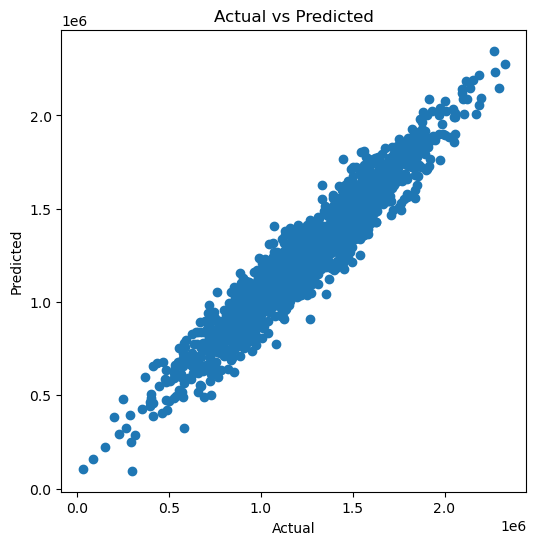

In [27]:
plt.figure(figsize=(6,6))
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted") 
plt.title("Actual vs Predicted")
plt.show()

In [28]:
# Evaluate the model
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9161592498859868

- The model demonstrated excellent predictive performance, achieving an r2_score of 0.9161592498859868, which indicates that it explains 91.7% of
  the variance in the target variable. This high score reflects the model's strong ability to capture underlying patterns in the data.

  **strengths of the model include:**
  - High accuracy: Well-suited for making reliable predictions.
  - Robustness: The model suggests the model generalises wel to unseen data.
  - Practical application: With this level of precision , the model can be confidently deployed to real-world scenarios.

- However, it's essential to complement this analysis with addittional metrics like RMSE,MAE and diagnostics to ensure comprehensive evaluation. Fine
  tuning may further improve its edge cases.    
      

In [29]:
from sklearn import metrics

print('MAE', metrics.mean_absolute_error(y_test, y_pred))
print('MSE', metrics.mean_squared_error(y_test, y_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


MAE 81778.67911867336
MSE 10331657141.935215
RMSE 101644.75953995471
